# Time Series Project Title : Gold Price Ups and Downs

#### Step 1 Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Step 2: the read the csv file.

Also pd.DataFrame.head() gives first 5 rows of CSV file


In [2]:
data = pd.read_csv('https://github.com/aarakh/r-cheat-shits/raw/master/TimeSeriesAnalysis/monthly1.csv')
data = data[['Month','Price.2']]
data.head()

,Month,Price.2
0,2017-01,30210
1,2017-02,30480
2,2017-03,30290
3,2017-04,30280
4,2017-05,29810


Set Month as Index Column

In [3]:
## Rename Price.2 
data.rename(columns = {'Price.2':'Price'}, inplace = True)

In [4]:
data.set_index('Month')

,Price
Month,
2017-01,30210
2017-02,30480
2017-03,30290
2017-04,30280
2017-05,29810
...,...
2021-11,49470
2021-12,49010
2022-01,49830


In [5]:
data.head()

,Month,Price
0,2017-01,30210
1,2017-02,30480
2,2017-03,30290
3,2017-04,30280
4,2017-05,29810


In [6]:
data.describe()

,Price
count,63.000000
mean,39585.952381
std,8730.798926
min,29480.000000
25%,31255.000000
50%,38880.000000
75%,48395.000000
max,55400.000000


In [7]:
# Set Month Index Columns as first date of Month
data.Month = pd.to_datetime(data['Month'])
data.head()

,Month,Price
0,2017-01-01,30210
1,2017-02-01,30480
2,2017-03-01,30290
3,2017-04-01,30280
4,2017-05-01,29810


In [8]:
## check for NULL values
data.isna()

,Month,Price
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
58,False,False
59,False,False
60,False,False
61,False,False


In [9]:
data['Price'].isna().sum()

0

In [10]:
data = data.dropna()

In [11]:
data.head()

,Month,Price
0,2017-01-01,30210
1,2017-02-01,30480
2,2017-03-01,30290
3,2017-04-01,30280
4,2017-05-01,29810


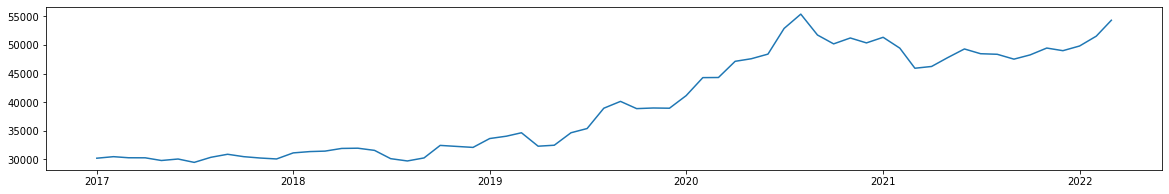

In [12]:
plt.figure(figsize=(20,3))
plt.plot(data.Month,data.Price)

In [13]:
#  check the trend and seasonality of the given data
from statsmodels.tsa.seasonal import seasonal_decompose as sd

In [14]:
data.head()

,Month,Price
0,2017-01-01,30210
1,2017-02-01,30480
2,2017-03-01,30290
3,2017-04-01,30280
4,2017-05-01,29810


In [15]:
data = data.set_index('Month')

In [16]:
data.head()

,Price
Month,
2017-01-01,30210
2017-02-01,30480
2017-03-01,30290
2017-04-01,30280
2017-05-01,29810


In [17]:
analysis_df = data[['Price']].copy()

In [18]:
analysis_df.head()

,Price
Month,
2017-01-01,30210
2017-02-01,30480
2017-03-01,30290
2017-04-01,30280
2017-05-01,29810


In [19]:
data.shape

(63, 1)

In [20]:
decomposed_data = sd(analysis_df,model='additive')

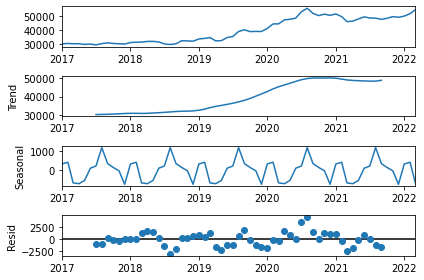

In [21]:
decomposed_data.plot()
plt.show()

##### From above graphs there is Upward Trend and Seasonality

In [22]:
## now checking seasonality Trend
seasonal_value =  decomposed_data.seasonal

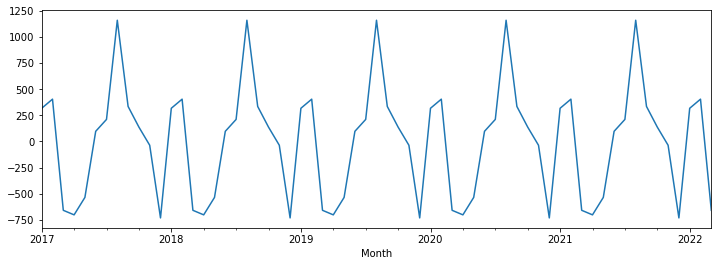

In [23]:
plt.figure(figsize=(12,4))
seasonal_value.plot()
plt.show()

##### Lets us check whether given data for Stationary nature using ADF(Augmented Dicky Fuller) Test

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
adf_result = adfuller(data['Price'])

In [26]:
print('p-Value: ',adf_result[1])

p-Value:  0.9136101791533542


#####  Here p-Value > 0.05, so taking first Order differentiation

In [27]:
data_diff_1 = data.diff()

In [28]:
data_diff_1.shape

(63, 1)

In [29]:
data_diff_1 = data_diff_1.dropna()

#### Again re-test for ADF Test

In [30]:
adf_result = adfuller(data_diff_1['Price'])

In [31]:
print('p-Value: ',adf_result[1])

p-Value:  0.1620837150846713


#### Here p-Value > 0.05, so taking second Order differentiation

In [32]:
data_diff_2 = data_diff_1.diff()

In [33]:
data_diff_2.shape

(62, 1)

In [34]:
data_diff_2 = data_diff_2.dropna()

In [35]:
adf_result = adfuller(data_diff_2['Price'])

In [36]:
print('p-Value: ',adf_result[1])

p-Value:  3.00788555829929e-13


##### Implement SARIMAX, here order of differentiation is 2

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

/home/aarakh/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


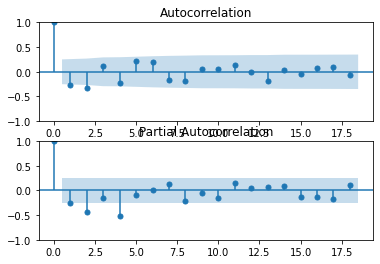

In [38]:
series = data_diff_2['Price']

plt.figure()
plt.subplot(211)
plot_acf(series, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, ax=plt.gca())
plt.show()


In [39]:
## for monthly data lasg value is s=12,d=2(order of differentiation) 
sarimax_model = SARIMAX(data['Price'],order = (1,1,2),seasonal_order = (1,1,2,12))

/home/aarakh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/aarakh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [40]:
sarimax = sarimax_model.fit()

/home/aarakh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.62781D+00    |proj g|=  8.55906D-01

At iterate    5    f=  7.21452D+00    |proj g|=  4.53222D-02

At iterate   10    f=  7.20579D+00    |proj g|=  2.11549D-03

At iterate   15    f=  7.20558D+00    |proj g|=  3.92533D-03

At iterate   20    f=  7.20557D+00    |proj g|=  9.22979D-04

At iterate   25    f=  7.20541D+00    |proj g|=  1.44893D-02

At iterate   30    f=  7.20284D+00    |proj g|=  3.96582D-02

At iterate   35    f=  7.20160D+00    |proj g|=  1.88299D-03

At iterate   40    f=  7.20156D+00    |proj g|=  3.02407D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [41]:
sarimax

In [42]:
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                   63
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -453.698
Date:                            Sat, 02 Apr 2022   AIC                            921.396
Time:                                    12:45:41   BIC                            934.780
Sample:                                01-01-2017   HQIC                           926.493
                                     - 03-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0450      2.375      0.019      0.985      -4.610       4.700
ma.L1          0.0469      2.368      0.020      0.984      -4.594       4.688
ma.L2         -0.0781      0.278     -0.281      0.778      -0.622       0.466
ar.S.L12       0.0504      0.813      0.062      0.951      -1.543       1.644
ma.S.L12      -0.4385      0.872     -0.503      0.615      -2.148       1.271
ma.S.L24      -0.1232      0.284     -0.433      0.665      -0.680       0.434
sigma2      5.269e+06    1.6e+06      3.298      0.001    2.14e+06     8.4e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.03   Jarque-Bera (JB):                 0.31
Prob(Q):                              0.31   Prob(JB):                         0.86
Heteroskedasticity (H):               2.62   Skew:                             0.18
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.88e+14. Standard errors may be unstable.
"""

In [43]:
data_sarimax = data

In [44]:
data_sarimax.shape

(63, 1)

In [45]:
data_sarimax.tail(25)

,Price
Month,
2020-03-01,44320
2020-04-01,47150
2020-05-01,47600
2020-06-01,48410
2020-07-01,52900
2020-08-01,55400
2020-09-01,51750
2020-10-01,50200
2020-11-01,51230


In [46]:
data_sarimax['sarimax_predicted'] = sarimax.predict(start = 45, end = 65)

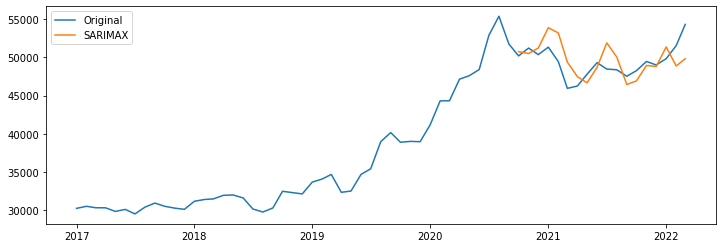

In [47]:
plt.figure(figsize=(12,4),linewidth =2)
plt.plot(data_sarimax['Price'])
plt.plot(data_sarimax['sarimax_predicted'])
plt.legend(['Original','SARIMAX'],loc = 'best')

In [48]:
data_sarimax.tail(20)

,Price,sarimax_predicted
Month,,
2020-08-01,55400,NaN
2020-09-01,51750,NaN
2020-10-01,50200,50764.455536
2020-11-01,51230,50515.059307
2020-12-01,50370,51234.508208
2021-01-01,51350,53892.298765
2021-02-01,49450,53209.970528
2021-03-01,45940,49376.399421
2021-04-01,46250,47483.743524


In [49]:
data.tail()

,Price,sarimax_predicted
Month,,
2021-11-01,49470,48951.516244
2021-12-01,49010,48813.332962
2022-01-01,49830,51370.498215
2022-02-01,51550,48882.729794
2022-03-01,54330,49827.256576


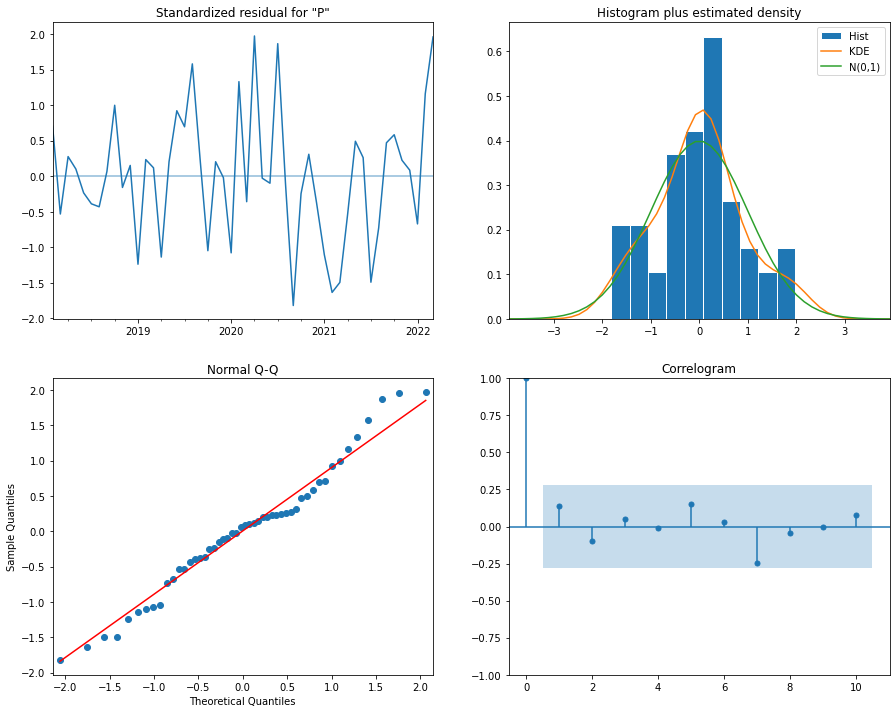

In [50]:
sarimax.plot_diagnostics(figsize=(15, 12))
plt.show()



In [51]:
print("RMSE: ",np.sqrt(mean_squared_error(data['Price'].iloc[45:60],data['sarimax_predicted'].iloc[45:60])))
print("R2 SCORE: ",r2_score(data['Price'].iloc[45:60],data['sarimax_predicted'].iloc[45:60]))

RMSE:  1915.031039185805
R2 SCORE:  -0.5370047488125138


In [52]:
## ARCH Model
## define model
##! pip install arch
from arch import arch_model

In [53]:
arch_model =  arch_model(data['Price'].astype('double'),mean='Zero', vol = 'ARCH', p=1)
### forecast next 1 days
n_predict = 1

In [54]:
# fit model
arch_model_fit = arch_model.fit()
arch_model_fit

Iteration:      1,   Func. Count:      4,   Neg. LLF: 754.9141465899288
Iteration:      2,   Func. Count:      6,   Neg. LLF: 754.91414659592
Optimization terminated successfully    (Exit mode 0)
            Current function value: 754.9141465899288
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2


/home/aarakh/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.502e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


                        Zero Mean - ARCH Model Results                        
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.016
Vol Model:                       ARCH   Log-Likelihood:               -754.914
Distribution:                  Normal   AIC:                           1513.83
Method:            Maximum Likelihood   BIC:                           1518.11
                                        No. Observations:                   63
Date:                Sat, Apr 02 2022   Df Residuals:                       63
Time:                        12:46:07   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      7.5017e+06  3.045e+07      0.246      0.805 

In [55]:
arch_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.016
Vol Model:                       ARCH   Log-Likelihood:               -754.914
Distribution:                  Normal   AIC:                           1513.83
Method:            Maximum Likelihood   BIC:                           1518.11
                                        No. Observations:                   63
Date:                Sat, Apr 02 2022   Df Residuals:                       63
Time:                        12:46:07   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      7.5017e+06  3.045e+07      0.246      0.805 [-5.219e+07,6.719e+07]
alpha[1]       1.0000  2.607e-02     38.358      0.000      [  0.949,  1.051]
=============================================================================

Covariance estimator: robust
"""

In [56]:
arch_predicted = arch_model_fit.forecast(horizon = n_predict)
arch_predicted.variance.tail()
#The values in the columns h.1 are one-step ahead forecast, 
#while values in h.2, …, h.5 are 2, …, 5-observation ahead forecasts

# in case of ARCH by default forecasts are  only produced 
# for observations after the final observation used to estimate model

# the default forecast only productes 

/home/aarakh/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


,h.1
Month,
2021-11-01,NaN
2021-12-01,NaN
2022-01-01,NaN
2022-02-01,NaN
2022-03-01,2.959251e+09


In [57]:
np.sqrt(arch_predicted.variance.values[-1,:][0])

54398.994383983445

In [58]:
print(arch_predicted.mean.iloc[-3:])
print(arch_predicted.residual_variance.iloc[-3:])
print(arch_predicted.variance.iloc[-3:])



            h.1
Month          
2022-01-01  NaN
2022-02-01  NaN
2022-03-01  0.0
                     h.1
Month                   
2022-01-01           NaN
2022-02-01           NaN
2022-03-01  2.959251e+09
                     h.1
Month                   
2022-01-01           NaN
2022-02-01           NaN
2022-03-01  2.959251e+09


In [59]:
data_sarimax.tail(20)

,Price,sarimax_predicted
Month,,
2020-08-01,55400,NaN
2020-09-01,51750,NaN
2020-10-01,50200,50764.455536
2020-11-01,51230,50515.059307
2020-12-01,50370,51234.508208
2021-01-01,51350,53892.298765
2021-02-01,49450,53209.970528
2021-03-01,45940,49376.399421
2021-04-01,46250,47483.743524


In [60]:
from arch import arch_model

In [61]:
### Since ARCH is forecasting next occurance from data set.
data_arch = data_sarimax['Price'].astype('double')
rolling = []
window = 20
for i in range(window):
    train_d = data_arch[:-(window-i)]
    data_arch_model =  arch_model(train_d, mean='Zero', vol = 'ARCH', p=1).fit(disp='off')
    arch_pred = data_arch_model.forecast(horizon = n_predict)
    #data_sarimax['arch_predicted'].append(np.sqrt(arch_pred.variance.values[-1,:][0]))
    rolling.append(np.sqrt(arch_pred.variance.values[-1,:][0]))


/home/aarakh/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.638e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/home/aarakh/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/aarakh/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: Da

/home/aarakh/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [62]:
rolling

[52934.37822279526,
 55440.55202061865,
 51798.11821163641,
 50252.991895772786,
 51285.54111513015,
 50429.31029044957,
 51411.22123169143,
 49515.415117324774,
 46010.638388729894,
 46320.43813077586,
 47868.924017201374,
 49378.06339715436,
 48550.023810277315,
 48450.828633506746,
 47602.37713837805,
 48341.73254340375,
 49540.79065291741,
 49082.00452855316,
 49901.56662523514,
 51620.43108754476]

In [63]:
data_arch2 = data_sarimax[['Price','sarimax_predicted']]
data_arch2

,Price,sarimax_predicted
Month,,
2017-01-01,30210,NaN
2017-02-01,30480,NaN
2017-03-01,30290,NaN
2017-04-01,30280,NaN
2017-05-01,29810,NaN
...,...,...
2021-11-01,49470,48951.516244
2021-12-01,49010,48813.332962
2022-01-01,49830,51370.498215


In [64]:
data_arch2['arch_predicted'] = np.nan
data_arch2['arch_predicted'].loc[-(window):] = rolling
data_arch2

/home/aarakh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  
/home/aarakh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Price,sarimax_predicted,arch_predicted
Month,,,
2017-01-01,30210,NaN,NaN
2017-02-01,30480,NaN,NaN
2017-03-01,30290,NaN,NaN
2017-04-01,30280,NaN,NaN
2017-05-01,29810,NaN,NaN
...,...,...,...
2021-11-01,49470,48951.516244,48341.732543
2021-12-01,49010,48813.332962,49540.790653
2022-01-01,49830,51370.498215,49082.004529


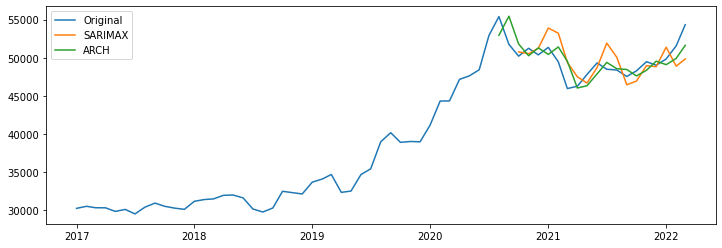

In [65]:
plt.figure(figsize=(12,4),linewidth =2)
plt.plot(data_arch2['Price'])
plt.plot(data_arch2['sarimax_predicted'])
plt.plot(data_arch2['arch_predicted'])
plt.legend(['Original','SARIMAX','ARCH'],loc = 'best')

In [66]:
## GARCH Model
## define model
# The arch_model() function can specify a GARCH instead of ARCH model vol=’GARCH’ 
# as well as the lag parameters for both. p=1 and q=1

In [68]:
### Since GARCH is forecasting next occurance similar to ARCH from data set.
data_arch = data_arch2['Price'].astype('double') 
rolling = []
window = 15
for i in range(window):
    train_d = data_arch[:-(window-i)]
    data_garch_model =  arch_model(train_d, mean='Zero', vol = 'GARCH', p=1, q=1).fit(disp='off')
    garch_pred = data_garch_model.forecast(horizon = n_predict)
    #data_sarimax['arch_predicted'].append(np.sqrt(arch_pred.variance.values[-1,:][0]))
    rolling.append(np.sqrt(garch_pred.variance.values[-1,:][0]))

/home/aarakh/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/aarakh/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.291e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/home/aarakh/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21:

/home/aarakh/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/home/aarakh/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.063e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/home/aarakh/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21:

In [69]:
data_garch_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.016
Vol Model:                      GARCH   Log-Likelihood:               -742.589
Distribution:                  Normal   AIC:                           1491.18
Method:            Maximum Likelihood   BIC:                           1497.56
                                        No. Observations:                   62
Date:                Sat, Apr 02 2022   Df Residuals:                       62
Time:                        12:47:54   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.2419e+07  3.409e+07      0.951      0.342 [-3.439e+07,9.923e+07]
alpha[1]       0.9929      0.128      7.756  8.768e-15      [  0.742,  1.244]
beta[1]    1.7083e-16      0.137  1.249e-15      1.000      [ -0.268,  0.268]
=============================================================================

Covariance estimator: robust
"""

In [70]:
data_arch2['garch_predicted'] = np.nan
data_arch2['garch_predicted'].loc[-window:] = rolling
data_arch2

/home/aarakh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  
/home/aarakh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Price,sarimax_predicted,arch_predicted,garch_predicted
Month,,,,
2017-01-01,30210,NaN,NaN,NaN
2017-02-01,30480,NaN,NaN,NaN
2017-03-01,30290,NaN,NaN,NaN
2017-04-01,30280,NaN,NaN,NaN
2017-05-01,29810,NaN,NaN,NaN
...,...,...,...,...
2021-11-01,49470,48951.516244,48341.732543,48400.024790
2021-12-01,49010,48813.332962,49540.790653,49603.458172
2022-01-01,49830,51370.498215,49082.004529,49135.187438


In [71]:
## plotting Original Value, SARIMAX, ARCH and GARCH for comparison

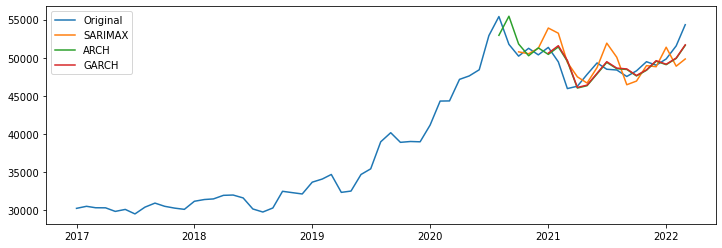

In [72]:
plt.figure(figsize=(12,4),linewidth =2)
plt.plot(data_arch2['Price'])
plt.plot(data_arch2['sarimax_predicted'])
plt.plot(data_arch2['arch_predicted'])
plt.plot(data_arch2['garch_predicted'])
plt.legend(['Original','SARIMAX','ARCH','GARCH'],loc = 'best')